# Prelimary data analysis

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [105]:
wordle_data = pd.read_feather("twordle_1M.feather")

In [106]:
wordle_data

,target,date,rows
0,abbey,2022-01-13,"[⬛🟨⬛⬛⬛, ⬛🟨🟨⬛⬛, 🟩⬛🟨⬛⬛, 🟩⬛⬛🟩⬛, 🟩🟩🟩🟩⬛, 🟩🟩🟩🟩🟩]"
1,crank,2022-01-08,"[⬛⬛🟨⬛⬛, 🟩🟨🟨⬛⬛, 🟩⬛🟩🟩⬛, 🟩⬛🟩🟩⬛, 🟩🟩🟩🟩🟩]"
2,crimp,2022-01-23,"[⬛🟨🟨⬛⬛, ⬛⬛🟨🟨⬛, 🟨🟩🟩🟩⬛, 🟩🟩🟩🟩🟩]"
3,cynic,2022-02-15,"[⬛🟨⬛⬛🟨, ⬛🟨⬛⬛⬛, ⬛⬛⬛⬛🟨, 🟩🟩🟩🟩🟩]"
4,favor,2022-01-12,"[⬛🟨🟨⬛⬛, ⬛🟨🟨⬛⬛, ⬛⬛🟨🟨⬛, ⬛⬛⬛🟩🟩, 🟩🟩🟩🟩🟩]"
...,...,...,...
999995,pause,2022-02-09,"[🟩⬛🟨🟨⬛, ⬛⬛🟩⬛⬛, 🟩🟩🟩🟩🟩]"
999996,those,2022-02-01,"[⬛⬛⬛🟨🟨, 🟩🟩⬛⬛⬛, 🟩🟩⬛🟨⬛, 🟩🟩🟩🟩🟩]"
999997,could,2022-01-29,"[⬛⬛⬛⬛⬛, 🟨⬛⬛⬛⬛, ⬛🟩⬛⬛⬛, 🟩🟨🟨🟨🟩, 🟩🟩🟩🟩🟩]"
999998,humor,2022-02-08,"[⬛🟨⬛🟨⬛, 🟩⬛⬛⬛🟩, 🟩⬛⬛🟩🟩, 🟩🟩🟩🟩🟩]"


## Number of trials

In [107]:
wordle_data['length'] = wordle_data['rows'].str.len()

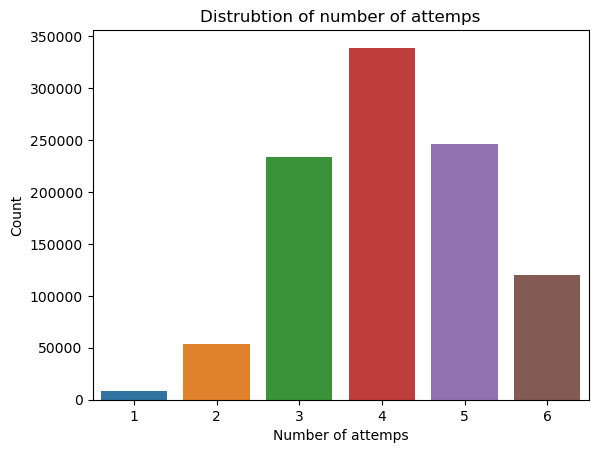

In [108]:
length_plot = sns.countplot(data = wordle_data, x = 'length')
length_plot.set_title("Distrubtion of number of attemps")
length_plot.set_xlabel("Number of attemps")
length_plot.set_ylabel("Count");

In [109]:
wordle_data['length'].describe()

count    1000000.000000
mean           4.120360
std            1.109935
min            1.000000
25%            3.000000
50%            4.000000
75%            5.000000
max            6.000000
Name: length, dtype: float64

## Winrate
We can see that all the games end with a winning move.

In [110]:
wordle_data["rows"].str[-1].describe()

count     1000000
unique          1
top         🟩🟩🟩🟩🟩
freq      1000000
Name: rows, dtype: object

## Distrution of guesses, misses and misplacements

### First attempt

In [111]:
wordle_data['rows'].str[0]

0         ⬛🟨⬛⬛⬛
1         ⬛⬛🟨⬛⬛
2         ⬛🟨🟨⬛⬛
3         ⬛🟨⬛⬛🟨
4         ⬛🟨🟨⬛⬛
          ...  
999995    🟩⬛🟨🟨⬛
999996    ⬛⬛⬛🟨🟨
999997    ⬛⬛⬛⬛⬛
999998    ⬛🟨⬛🟨⬛
999999    ⬛⬛⬛🟨⬛
Name: rows, Length: 1000000, dtype: object

In [112]:
first_attemps = pd.DataFrame(wordle_data['rows'].str[0])

In [113]:
first_attemps['green_count'] = first_attemps['rows'].str.count('🟩')
first_attemps['yellow_count'] = first_attemps['rows'].str.count('🟨')
first_attemps['black_count'] = first_attemps['rows'].str.count('⬛')

In [114]:
first_attemps.head()

,rows,green_count,yellow_count,black_count
0,⬛🟨⬛⬛⬛,0,1,4
1,⬛⬛🟨⬛⬛,0,1,4
2,⬛🟨🟨⬛⬛,0,2,3
3,⬛🟨⬛⬛🟨,0,2,3
4,⬛🟨🟨⬛⬛,0,2,3


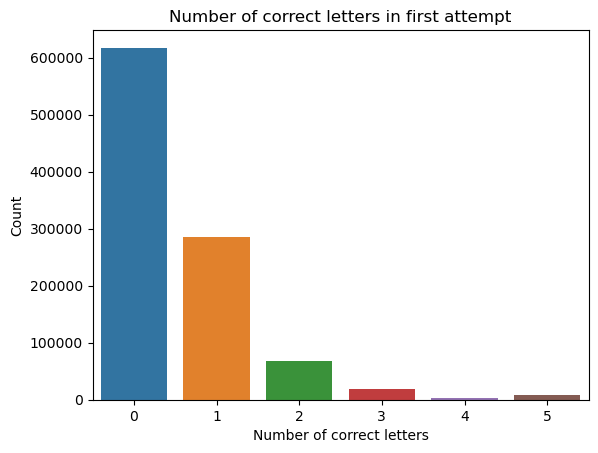

In [115]:
fa_green = sns.countplot(data = first_attemps, x = 'green_count')
fa_green.set_title("Number of correct letters in first attempt")
fa_green.set_xlabel("Number of correct letters")
fa_green.set_ylabel("Count");

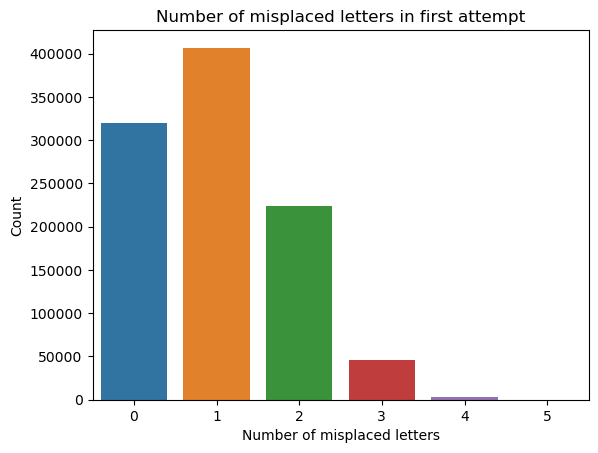

In [116]:
fa_yellow = sns.countplot(data = first_attemps, x = 'yellow_count')
fa_yellow.set_title("Number of misplaced letters in first attempt")
fa_yellow.set_xlabel("Number of misplaced letters")
fa_yellow.set_ylabel("Count");

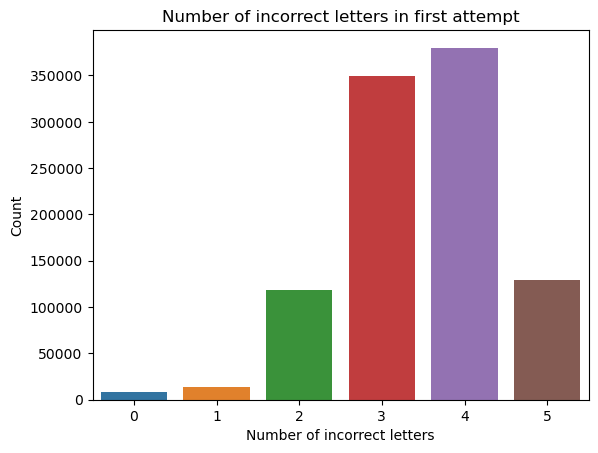

In [117]:
fa_black = sns.countplot(data = first_attemps, x = 'black_count')
fa_black.set_title("Number of incorrect letters in first attempt")
fa_black.set_xlabel("Number of incorrect letters")
fa_black.set_ylabel("Count");

### Across all attemps

Attemp number six is not used due to it consisting of only wins.

In [118]:
attemps = first_attemps.copy()
attemps['attemp'] = 1
attemps = attemps.drop(columns=['rows'])

In [119]:
for i in range(2,6):
    aux = pd.DataFrame(wordle_data['rows'].str[i])
    aux = aux.dropna()
    aux['green_count'] = aux['rows'].str.count('🟩')
    aux['yellow_count'] = aux['rows'].str.count('🟨')
    aux['black_count'] = aux['rows'].str.count('⬛')
    aux = aux.drop(columns=['rows'])
    aux['attemp'] = i
    attemps = pd.concat([attemps, aux])

In [1]:
overall_green = sns.countplot(data = attemps, x = 'green_count', hue = 'attemp')
overall_green.set_title("Number of correct letters by attempt")
overall_green.set_xlabel("Number of correct letters by attempt")
overall_green.set_ylabel("Count");
word_plot.figure.set_figwidth(11);

NameError: name 'sns' is not defined

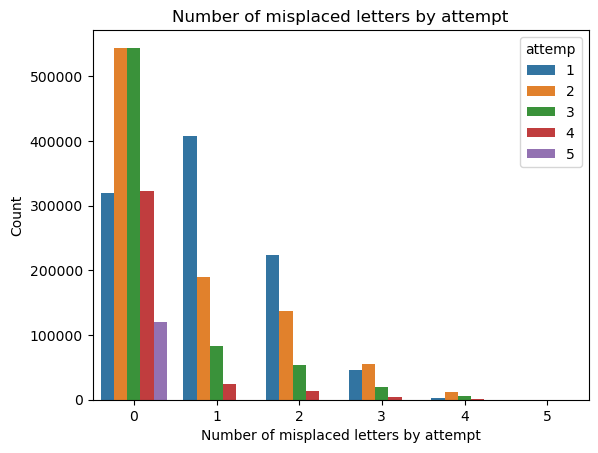

In [121]:
overall_yellow = sns.countplot(data = attemps, x = 'yellow_count', hue = 'attemp')
overall_yellow.set_title("Number of misplaced letters by attempt")
overall_yellow.set_xlabel("Number of misplaced letters by attempt")
overall_yellow.set_ylabel("Count");

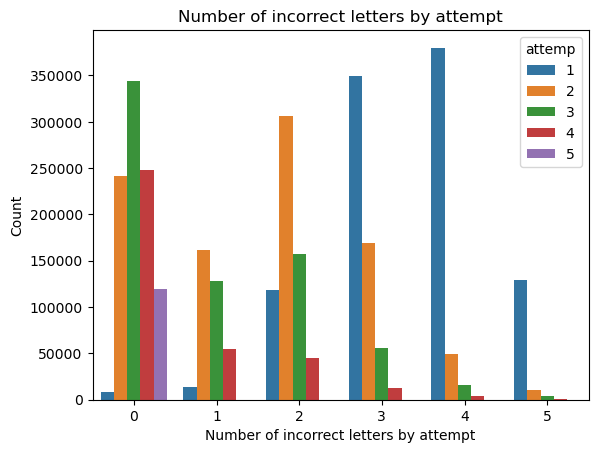

In [122]:
overall_black = sns.countplot(data = attemps, x = 'black_count', hue = 'attemp')
overall_black.set_title("Number of incorrect letters by attempt")
overall_black.set_xlabel("Number of incorrect letters by attempt")
overall_black.set_ylabel("Count");

## Sorting by words

Let's see if any of the target words repeat themselves:

In [123]:
wordle_data['target'].describe()

count     1000000
unique         57
top         moist
freq        36078
Name: target, dtype: object

It appears so, there are only 57 target words in this dataset. Let's take a look at the distribution of the words:

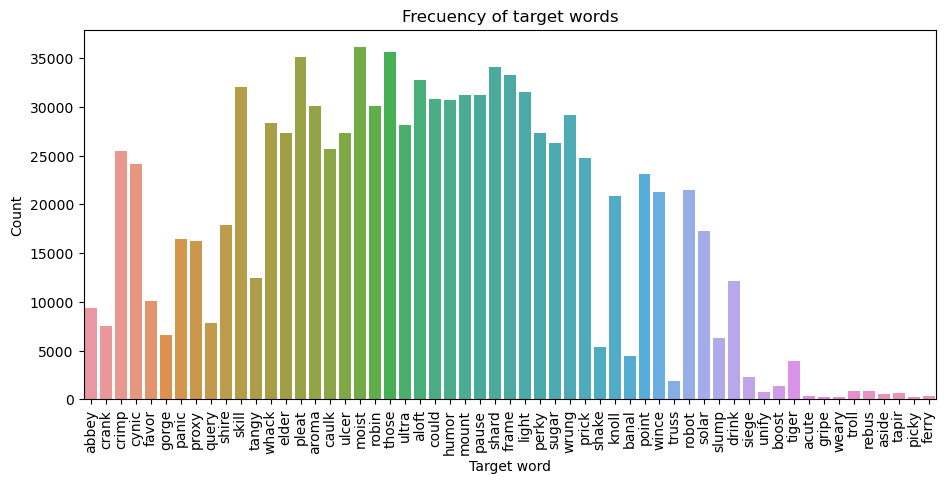

In [131]:
word_plot = sns.countplot(data = wordle_data, x = 'target')
word_plot.set_xlabel("Target word")
word_plot.set_ylabel("Count")
word_plot.set_title("Frecuency of target words")
word_plot.set_xticklabels(labels = word_plot.get_xticklabels() ,rotation = 90)
word_plot.figure.set_figwidth(11);

## Clustering for various words

Let's see if we can find a pattern on the types of players. To do that we will use a clustering algorithm the words that have the highest frequencies.

In [169]:
cluster_data = wordle_data.copy()
for i in range(1, 6):
    cluster_data['green_' + str(i)] = cluster_data['rows'].str[i-1].str.count('🟩')
    cluster_data['yellow_' + str(i)] = cluster_data['rows'].str[i-1].str.count('🟨')
    cluster_data['black_' + str(i)] = cluster_data['rows'].str[i-1].str.count('⬛')
cluster_data = cluster_data.fillna(-10);
cluster_data.iloc[:,4:] = cluster_data.iloc[:,4:].astype('int32')

In [172]:
cluster_data.head()

,target,date,rows,length,green_1,yellow_1,black_1,green_2,yellow_2,black_2,green_3,yellow_3,black_3,green_4,yellow_4,black_4,green_5,yellow_5,black_5
0,abbey,2022-01-13,"[⬛🟨⬛⬛⬛, ⬛🟨🟨⬛⬛, 🟩⬛🟨⬛⬛, 🟩⬛⬛🟩⬛, 🟩🟩🟩🟩⬛, 🟩🟩🟩🟩🟩]",6,0,1,4,0,2,3,1,1,3,2,0,3,4,0,1
1,crank,2022-01-08,"[⬛⬛🟨⬛⬛, 🟩🟨🟨⬛⬛, 🟩⬛🟩🟩⬛, 🟩⬛🟩🟩⬛, 🟩🟩🟩🟩🟩]",5,0,1,4,1,2,2,3,0,2,3,0,2,5,0,0
2,crimp,2022-01-23,"[⬛🟨🟨⬛⬛, ⬛⬛🟨🟨⬛, 🟨🟩🟩🟩⬛, 🟩🟩🟩🟩🟩]",4,0,2,3,0,2,3,3,1,1,5,0,0,-10,-10,-10
3,cynic,2022-02-15,"[⬛🟨⬛⬛🟨, ⬛🟨⬛⬛⬛, ⬛⬛⬛⬛🟨, 🟩🟩🟩🟩🟩]",4,0,2,3,0,1,4,0,1,4,5,0,0,-10,-10,-10
4,favor,2022-01-12,"[⬛🟨🟨⬛⬛, ⬛🟨🟨⬛⬛, ⬛⬛🟨🟨⬛, ⬛⬛⬛🟩🟩, 🟩🟩🟩🟩🟩]",5,0,2,3,0,2,3,0,2,3,2,0,3,5,0,0


### Distribution by length of game

In [183]:
moist_data = cluster_data.copy()
moist_data = moist_data.loc[moist_data['target'] == 'moist']
moist_data = moist_data.drop(columns = ['target', 'date', 'rows'])

<AxesSubplot:xlabel='length', ylabel='count'>

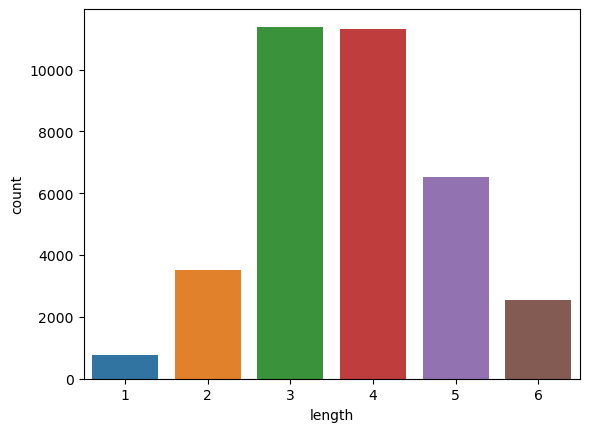

In [198]:
sns.countplot(data = moist_data, x = 'length')

### Clustering
#### Moist

In [202]:
moist_data = moist_data.drop(columns = ['length'])
wcss = [] 
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 123)
    kmeans.fit(moist_data) 
    wcss.append(kmeans.inertia_)
wcss

[8954859.448500482,
 4150580.024785905,
 1959973.1090077392,
 543708.7044389497,
 265966.48575528903,
 242608.85559241124,
 219956.06961860514,
 200155.24802461822,
 187924.40444263074,
 179941.75363574707]

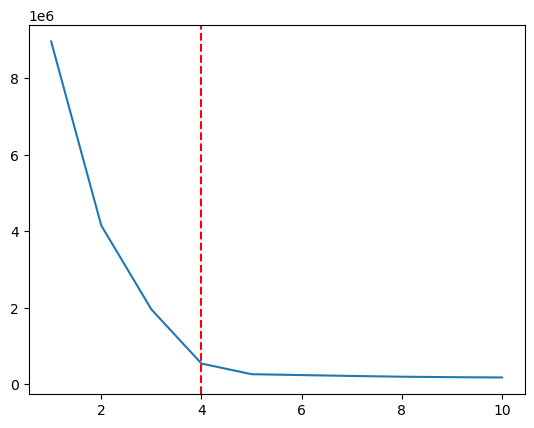

In [203]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10]
plt.plot(ks, wcss);
plt.axvline(4, linestyle='--', color='r')

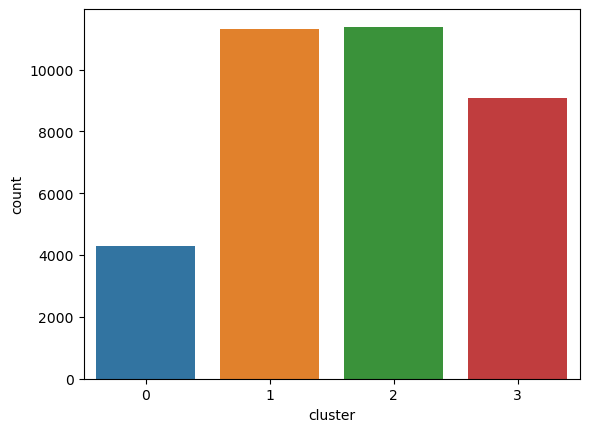

In [207]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(moist_data)
moist_data['cluster'] = kmeans.predict(moist_data)
sns.countplot(data = moist_data, x = 'cluster');

#### Those

In [209]:
those_data = cluster_data.copy()
those_data = those_data.loc[those_data['target'] == 'those']
those_data = those_data.drop(columns = ['target', 'date', 'rows'])

<AxesSubplot:xlabel='length', ylabel='count'>

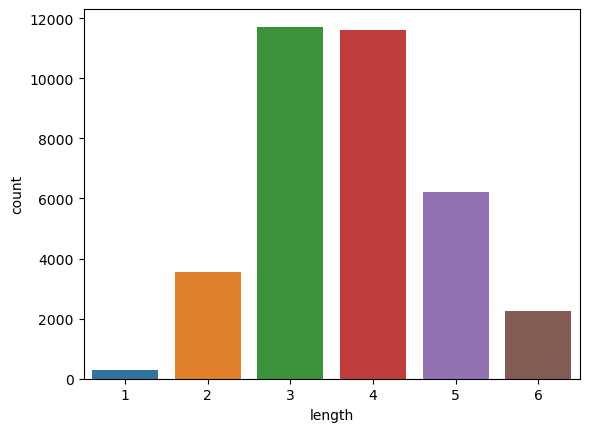

In [210]:
sns.countplot(data = those_data, x = 'length')

In [211]:
those_data = those_data.drop(columns = ['length'])
wcss = [] 
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 123)
    kmeans.fit(those_data) 
    wcss.append(kmeans.inertia_)
wcss

[8418667.416234182,
 3786774.9480430842,
 1672186.7471886782,
 399134.51339110103,
 284980.98782140954,
 257020.52663211478,
 230815.1536078225,
 211369.73723219818,
 197556.05877116384,
 188640.19692390595]

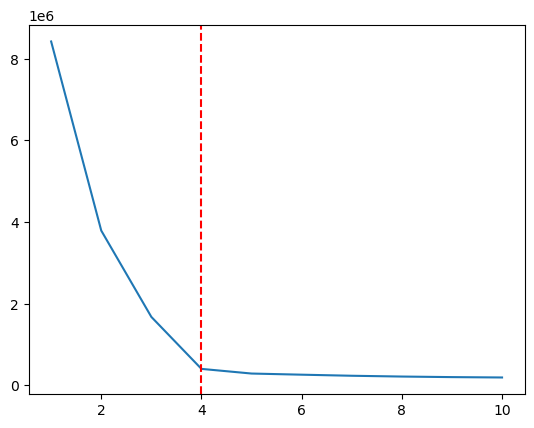

In [212]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10]
plt.plot(ks, wcss);
plt.axvline(4, linestyle='--', color='r')

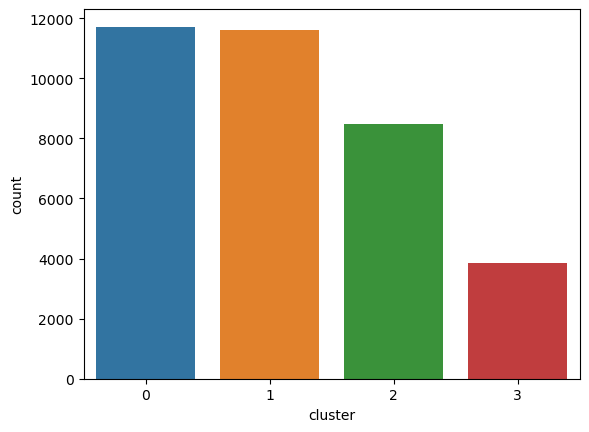

In [213]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(those_data)
those_data['cluster'] = kmeans.predict(those_data)
sns.countplot(data = those_data, x = 'cluster');